In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('Stress.csv')
df = df.dropna()
df

,Time (s),AVNN (ms),SDNN (ms),BPM,Label
1,0.00 - 60.00,858.35,222.48,69.90,Tidak Stress
2,60.00 - 120.00,793.98,212.91,75.57,Tidak Stress
3,120.00 - 180.00,847.93,247.15,70.76,Tidak Stress
4,180.00 - 240.00,789.68,189.98,75.98,Tidak Stress
5,240.00 - 300.00,816.62,224.84,73.47,Tidak Stress
...,...,...,...,...,...
1220,1200.00 - 1260.00,883.00,114.10,67.95,Tidak Stress
1221,1260.00 - 1320.00,904.20,100.90,66.36,Tidak Stress
1222,1320.00 - 1380.00,898.26,144.85,66.80,Tidak Stress
1223,1380.00 - 1440.00,904.20,118.96,66.36,Tidak Stress


In [ ]:
data_baru = df[['AVNN (ms)', 'SDNN (ms)', 'Label']]

In [ ]:
# Filter data berdasarkan kondisi yang ditentukan
filtered_data = data_baru[
    (data_baru['Label'] == 'Stress') &
    (data_baru['AVNN (ms)'] > 900) &
    (data_baru['SDNN (ms)'] > 57)
]

# Menampilkan hasil filter
print(filtered_data)

      AVNN (ms)  SDNN (ms)   Label
544      941.12      59.80  Stress
768      948.28      58.67  Stress
1059     958.38      59.39  Stress


In [ ]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
# Pisahkan fitur numerik dan label
X = data_baru[['AVNN (ms)', 'SDNN (ms)']]  # hanya data numerik
y = data_baru['Label']  # label tetap


# Ubah label jadi integer
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

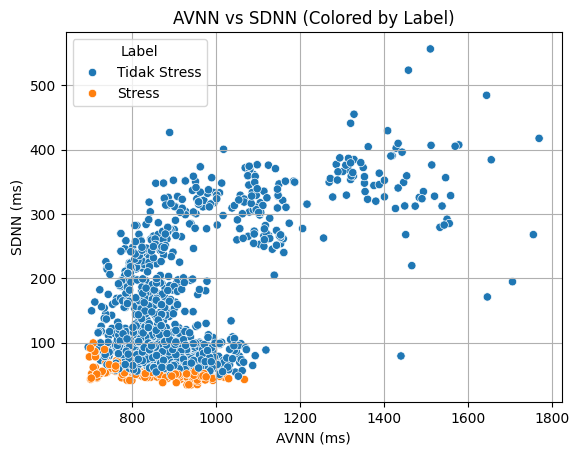

In [ ]:
sns.scatterplot(data=data_baru, x='AVNN (ms)', y='SDNN (ms)', hue='Label')

plt.title('AVNN vs SDNN (Colored by Label)')
plt.xlabel('AVNN (ms)')
plt.ylabel('SDNN (ms)')
plt.grid(True)
plt.legend(title='Label')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42)


Random Forrest

In [ ]:
pip install micromlgen

  Preparing metadata (setup.py) ... done
  Created wheel for micromlgen: filename=micromlgen-1.1.28-py3-none-any.whl size=32152 sha256=0f07ab6a568f208adb77ce993041a8f9df6110404705827b3e23baf986d8f557
  Stored in directory: /root/.cache/pip/wheels/aa/3a/19/9fd4635f110202e18f3b4bb631e90287ba06eb406999726cb9
Successfully built micromlgen


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = model.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi: 0.9510204081632653

Confusion Matrix:
 [[ 22   8]
 [  4 211]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.96      0.98      0.97       215

    accuracy                           0.95       245
   macro avg       0.90      0.86      0.88       245
weighted avg       0.95      0.95      0.95       245



In [ ]:
from micromlgen import port

with open("model.h", "w") as model_file:
    model_file.write(port(model, classmap={0: "Stress", 1: "Tidak Stress"}))